In [7]:
# =========================================================================================================================================== #
# ============================================================ BASIC SETUP ================================================================== #
# =========================================================================================================================================== #

In [54]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# notebook / qt

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [55]:
store_df = pd.read_csv('./Data/store.csv')
train_df = pd.read_csv('./Data/train.csv')
test_df = pd.read_csv('./Data/test.csv')

C:\Users\thush\AppData\Local\Temp\ipykernel_49176\317461509.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./Data/train.csv')


In [56]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [57]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [58]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [59]:
# Merge train and store columns to retrieve meaningful information
merged_df = train_df.merge(store_df, on='Store', how='left')
merged_test_df = test_df.merge(store_df, on='Store', how='left')

In [60]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [61]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [62]:
merged_df[merged_df['Open'] == 0].Sales.value_counts()
# NOTICE that there is no sale when the shop is closed

Sales
0    172817
Name: count, dtype: int64

In [63]:
# Remove all rows where store is closed
merged_df = merged_df[merged_df['Open'] == 1].copy()

In [64]:
# =========================================================================================================================================== #
# ======================================================== FEATURE ENGINEERING ============================================================== #
# =========================================================================================================================================== #

In [65]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [66]:
split_date(merged_df)
split_date(merged_test_df)

In [67]:
merged_df.columns[-4:]

Index(['Year', 'Month', 'Day', 'WeekOfYear'], dtype='object')

In [68]:
# Find the number of months where a new store was open near nearby
def comp_open_months(df):
    df['CompetitionOpen'] = (12 * (df.Year - df.CompetitionOpenSinceYear) ) + df.CompetitionOpenSinceMonth
    # Replace negative values with 0
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [69]:
comp_open_months(merged_df)
comp_open_months(merged_test_df)

In [70]:
merged_df.CompetitionOpen

0           93.0
1          107.0
2          120.0
3           81.0
4            4.0
           ...  
1016776     93.0
1016827    178.0
1016863      0.0
1017042      0.0
1017190    135.0
Name: CompetitionOpen, Length: 844392, dtype: float64

In [71]:
def is_promo_month(row):
    month2str = {
        1: 'Jan', 2: 'Feb', 3: 'Mar',
        4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep',
        10: 'Oct', 11: 'Nov', 12: 'Dec'
    }
    
    try:
        # create an array of promotion months
        promo_months = row['PromoInterval' or ''].split(',')

        # if current month of the row is in promotion months return 1
        if row['Promo2Open'] and month2str[row['Month']] in promo_months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Calculate the number of months since promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek)* 7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']

    # Whether new promotions started in current month
    df['IsPromo2Month'] = df.apply(is_promo_month, axis=1) * df['Promo2']

In [72]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [73]:
merged_df[['Date', 'Year', 'Month', 'Day', 'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month']]

,Date,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,2015-07-31,2015,7,31,31,93.0,0.000000,0
1,2015-07-31,2015,7,31,31,107.0,64.131148,1
2,2015-07-31,2015,7,31,31,120.0,51.901639,1
3,2015-07-31,2015,7,31,31,81.0,0.000000,0
4,2015-07-31,2015,7,31,31,4.0,0.000000,0
...,...,...,...,...,...,...,...,...
1016776,2013-01-01,2013,1,1,1,93.0,0.000000,0
1016827,2013-01-01,2013,1,1,1,178.0,0.000000,0
1016863,2013-01-01,2013,1,1,1,0.0,1.213115,1
1017042,2013-01-01,2013,1,1,1,0.0,0.000000,0


In [74]:
# =========================================================================================================================================== #
# ========================================================== DATA PREPARATION =============================================================== #
# =========================================================================================================================================== #

In [75]:
merged_df.columns.to_list()

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'CompetitionOpen',
 'Promo2Open',
 'IsPromo2Month']

In [76]:
# ==================== IDENTIFY INPUT & TARGET COLUMNS ===================== #

In [77]:
input_cols = [
    'Store', 'Year', 'Month', 'Day', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType',
    'Assortment', 'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month'
]

target_col = 'Sales'

In [78]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

test_inputs = merged_test_df[input_cols].copy()
# Cannot extract test targets, because it has no 'Sales' column

In [79]:
inputs

,Store,Year,Month,Day,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Promo2,Promo2Open,IsPromo2Month
0,1,2015,7,31,5,1,0,1,c,a,1270.0,93.0,0,0.000000,0
1,2,2015,7,31,5,1,0,1,a,a,570.0,107.0,1,64.131148,1
2,3,2015,7,31,5,1,0,1,a,a,14130.0,120.0,1,51.901639,1
3,4,2015,7,31,5,1,0,1,c,c,620.0,81.0,0,0.000000,0
4,5,2015,7,31,5,1,0,1,a,a,29910.0,4.0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2013,1,1,2,0,a,1,b,a,150.0,93.0,0,0.000000,0
1016827,733,2013,1,1,2,0,a,1,b,b,860.0,178.0,0,0.000000,0
1016863,769,2013,1,1,2,0,a,1,b,b,840.0,0.0,1,1.213115,1
1017042,948,2013,1,1,2,0,a,1,b,b,1430.0,0.0,0,0.000000,0


In [80]:
# ==================== IMPUTING, SCALING, & ENCODING DATA ===================== #

In [81]:
# ======= IMPUTING NUMERICAL DATA ======== #

In [82]:
numeric_cols = [
    'Year', 'Month', 'Day', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpen',
    'Promo2', 'Promo2Open', 'IsPromo2Month'
]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [83]:
# Find missing numerical data
inputs[numeric_cols].isna().sum()

Year                      0
Month                     0
Day                       0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
dtype: int64

In [84]:
# We must not fill empty spaces of competition distance with 0
# Filling 0 means there is competition next to the store

maximum_distance = inputs.CompetitionDistance.max()
# Fill empty spaces with maximum distance * 2
inputs['CompetitionDistance'].fillna(maximum_distance * 2)
test_inputs['CompetitionDistance'].fillna(maximum_distance * 2)

0         1270.0
1        14130.0
2        24000.0
3         7520.0
4         2030.0
          ...   
41083     1900.0
41084     1880.0
41085     9260.0
41086      870.0
41087     5350.0
Name: CompetitionDistance, Length: 41088, dtype: float64

In [85]:
# ======= SCALING NUMERICAL DATA ======== #

In [86]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

scaler = MinMaxScaler().fit(inputs[numeric_cols])

inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [87]:
# ======== ENCODING CATEGORICAL DATA ======== #

In [88]:
def encode_and_merge(encoder, df):
    # encode categorical columns
    encoded_cols = encoder.fit_transform(df[categorical_cols])

    # convert to a dataframe
    encoded_df = pd.DataFrame(
        encoded_cols,
        columns = encoder.get_feature_names_out(categorical_cols),
        index = df.index,
    )

    # merge categorical and numeric columns
    merged_cols = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
    return merged_cols

In [89]:
# Convert values in categorical columns to strings
inputs[categorical_cols] = inputs[categorical_cols].astype(str)
test_inputs[categorical_cols] = test_inputs[categorical_cols].astype(str)

In [90]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(inputs[categorical_cols])

X_train = encode_and_merge(encoder, inputs)
X_test = encode_and_merge(encoder, test_inputs)

In [91]:
X_train

,Store,Year,Month,Day,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Promo2Open,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,1.0,0.545455,1.0,1.0,1.0,0.016482,0.067343,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,1.0,0.545455,1.0,1.0,1.0,0.007252,0.077480,1.0,0.890710,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1.0,0.545455,1.0,1.0,1.0,0.186050,0.086894,1.0,0.720856,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,1.0,0.545455,1.0,1.0,1.0,0.007911,0.058653,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,1.0,0.545455,1.0,1.0,1.0,0.394119,0.002896,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,0.0,0.000000,0.0,0.0,1.0,0.001714,0.067343,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016827,733,0.0,0.000000,0.0,0.0,1.0,0.011076,0.128892,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016863,769,0.0,0.000000,0.0,0.0,1.0,0.010812,0.000000,1.0,0.016849,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1017042,948,0.0,0.000000,0.0,0.0,1.0,0.018592,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [92]:
# =========================================================================================================================================== #
# ========================================================= GRADIENT BOOSTING =============================================================== #
# =========================================================================================================================================== #

In [93]:
from xgboost import XGBRegressor

In [94]:
model = XGBRegressor(random_state=42, n_jobs=-1, max_depth=4, n_estimators=20).fit(X_train, targets)
preds = model.predict(X_train)

In [95]:
from sklearn.metrics import mean_squared_error

def rmse(preds, targets):
    return np.sqrt(mean_squared_error(preds, targets))

In [96]:
rmse(preds, targets)

np.float64(2356.582377087633)

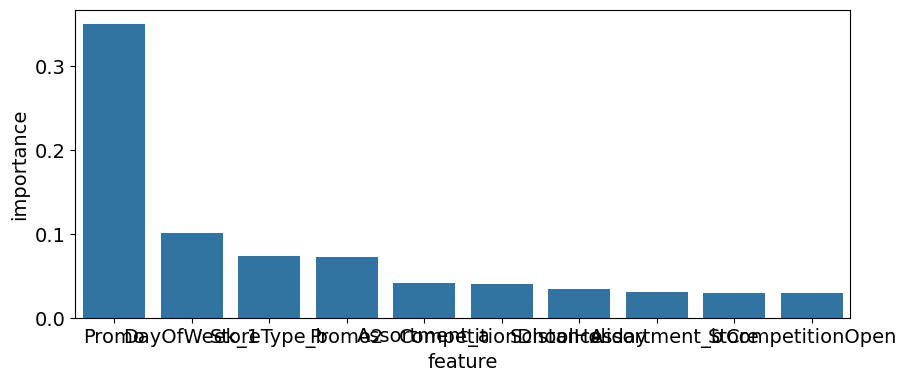

In [98]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_,
})

sns.barplot(importance_df.sort_values(by='importance', ascending=False).head(10), x='feature', y='importance')
plt.show()

In [101]:
# ==================== KFOLD CROSS VALIDATION STRATEGY ===================== #

In [102]:
from sklearn.model_selection import KFold

In [103]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **kwargs):
    model = XGBRegressor(random_state=42, n_jobs=-1, **kwargs).fit(X_train, train_targets)
    
    # Make predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Calculate RMSE 
    train_rmse = rmse(train_preds, train_targets)
    val_rmse = rmse(val_preds, val_targets)

    return model, train_rmse, val_rmse

In [104]:
k_fold = KFold(n_splits=5)

In [107]:
models = []

for train_idx, val_idx in k_fold.split(X_train):
    # use original X_train, targets
    X_tr, y_tr = X_train.iloc[train_idx], targets.iloc[train_idx]
    X_val, y_val = X_train.iloc[val_idx], targets.iloc[val_idx]

    model, train_rmse, val_rmse = train_and_evaluate(
        X_tr, y_tr, X_val, y_val, 
        max_depth=4, n_estimators=20
    )
    
    models.append(model)
    print(f'Train RMSE: {train_rmse} Validation RMSE: {val_rmse}')

Train RMSE: 2894.491406102288 Validation RMSE: 3169.6944647710134
Train RMSE: 2869.3267503022375 Validation RMSE: 3369.660071876687
Train RMSE: 2901.3341758577208 Validation RMSE: 3084.1924388727757
Train RMSE: 2868.9237529080483 Validation RMSE: 3394.2111012722826
Train RMSE: 2942.4588357358543 Validation RMSE: 3370.946306306287


In [108]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [110]:
preds = predict_avg(models, X_train)
preds

array([7770.206 , 7770.206 , 7770.206 , ..., 6848.362 , 6828.9385,
       6856.1553], dtype=float32)